# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치

## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

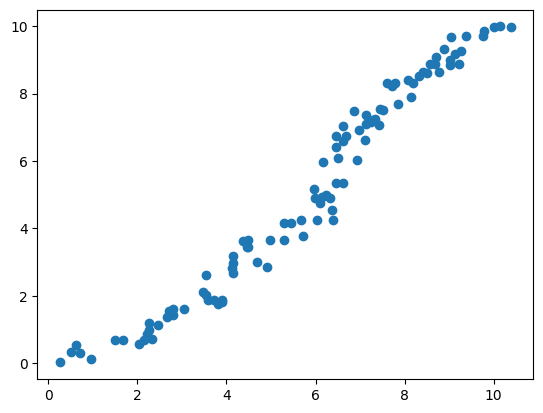

In [4]:
noise = np.random.rand(100,1)

X = sorted(10 * np.random.rand(100,1)) + noise
y = sorted(10 * np.random.rand(100))

plt.scatter(X,y)

plt. show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [12]:
print(f'선형회귀 가중치 : {model.coef_}')
print(f'선형회귀 편향 : {model.intercept_}')

선형회귀 가중치 : [1.19211661]
선형회귀 편향 : -1.7930457406348967


In [13]:
print(f'학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test, y_test)}')

학습 데이터 점수 : 0.9645956697657168
평가 데이터 점수 : 0.9306895220675991


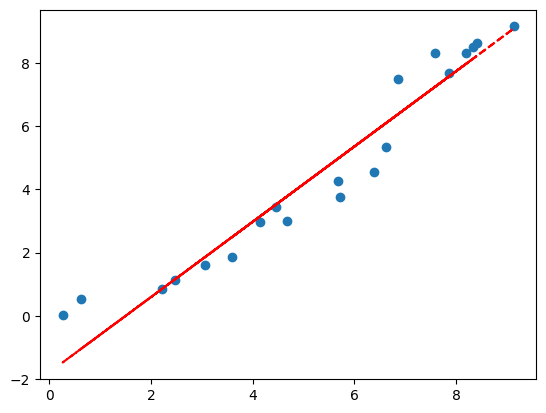

In [14]:
predict = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, predict, '--r')

plt.show()

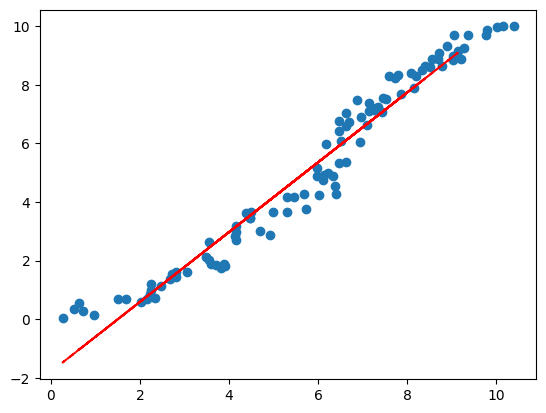

In [15]:
predict = model.predict(X_test)

plt.scatter(X, y)
plt.plot(X_test, predict, '--r')

plt.show()

### 보스턴 주택 가격 데이터

- 데이터를 분석하기 전에 분석 대상이 되는 데이터에 대한 이해가 바탕이 되어야 진정으로 좋은 분석을 할 수 있다

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성


    | 속성 | 설명 |
    |------|------|
    | CRIM | 자치시(town)별 1인당 범죄율 |
    | ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
    | INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
    | CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
    | NOX | 10,000,000당  일산화질소 농도 |
    | RM | 주택 1가구당 평균 방의 수 |
    | AGE | 1940년 이전에 건축된 소유주택 비율 |
    | DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
    | RAD | 방사형 고속도로 접근성 지수 |
    | TAX | 10,000 달러당 재산 세율 |
    | PTRATIO | 자치시(town)별 학생/교사 비율 |
    | B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
    | LSTAT | 모집단의 하위계층 비율(%) |
    | MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |


In [21]:
# from sklearn.datasets import load_boston

# boston = _california_housing()
# 보스턴 데이터는 scikit learn 1.2버전부터 없어짐
# 학문적 용도로 사용하나 문제 시 삭제 조치하도록 하겠습니다.

import pandas as pd
boston = pd.read_csv('./datasets/boston.csv')

print(boston.keys())
print('-'*30)
print(boston.describe())
print('-'*30)
print(boston.info())

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
------------------------------
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.00000

In [22]:
boston_df = boston

In [24]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


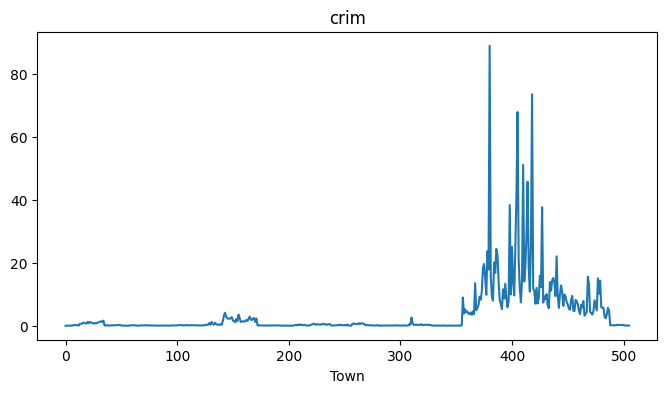

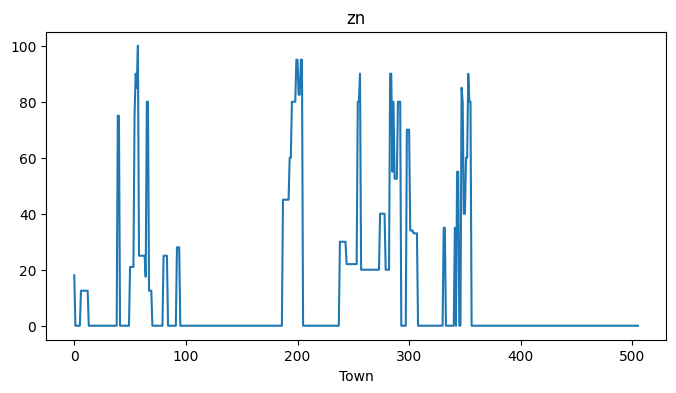

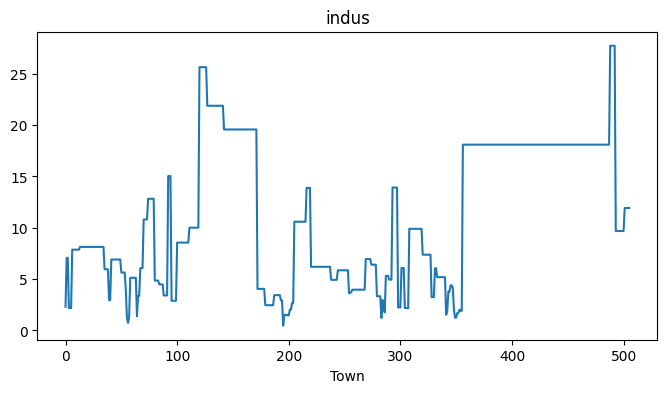

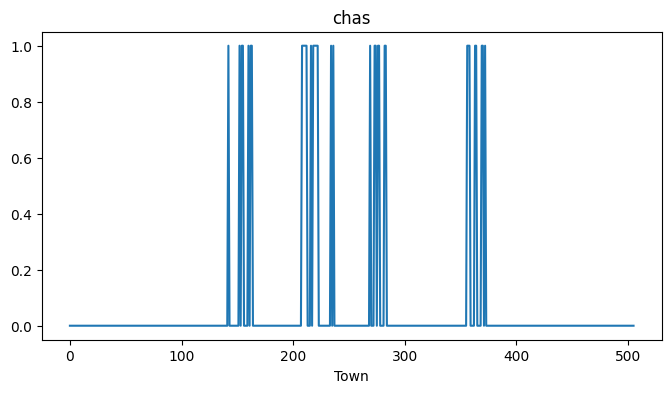

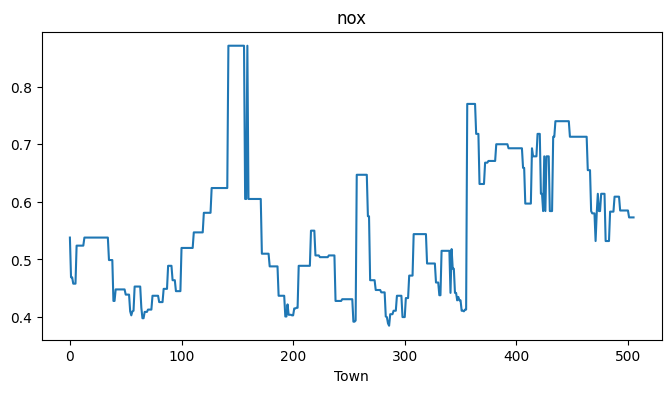

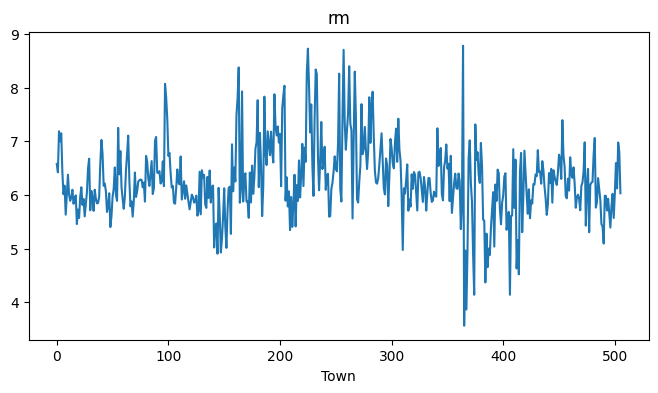

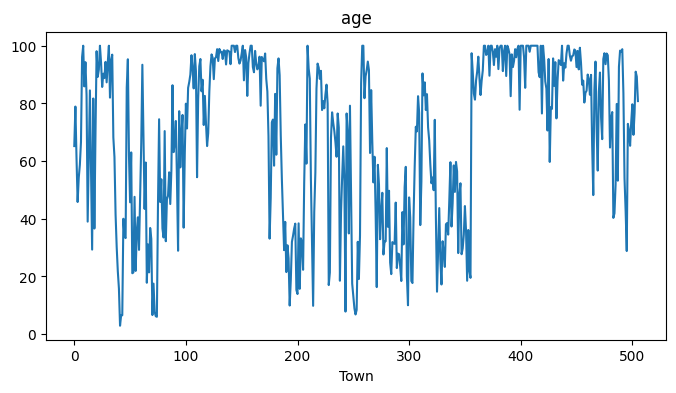

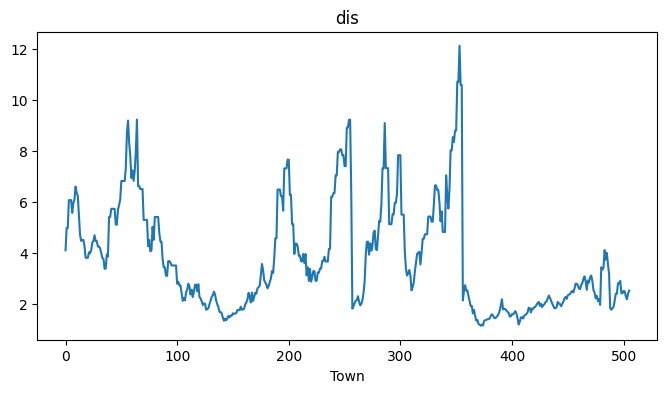

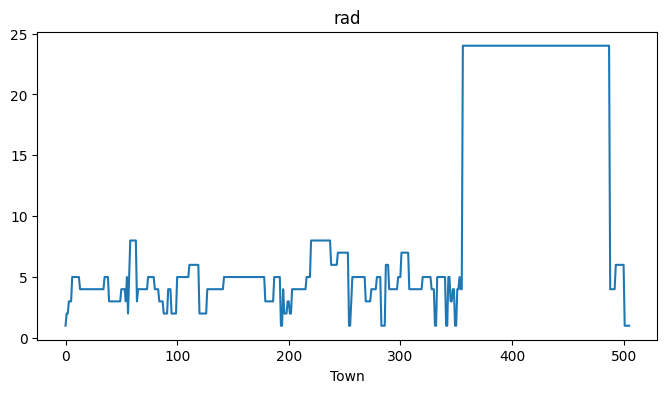

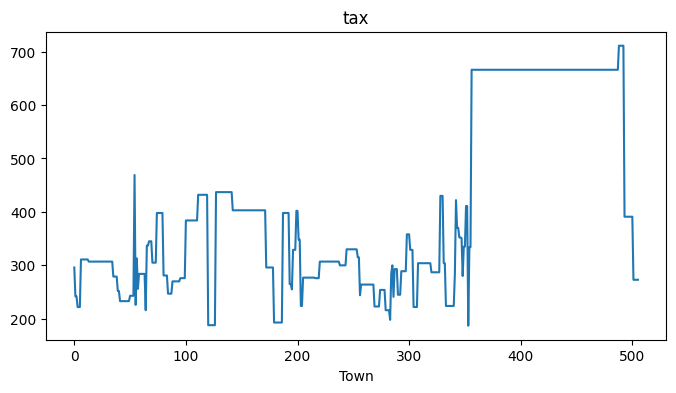

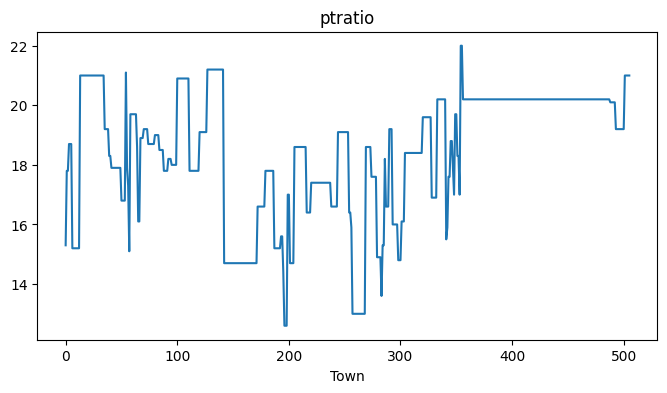

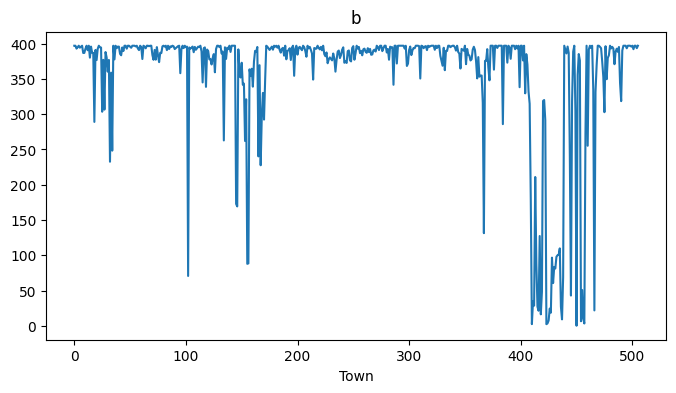

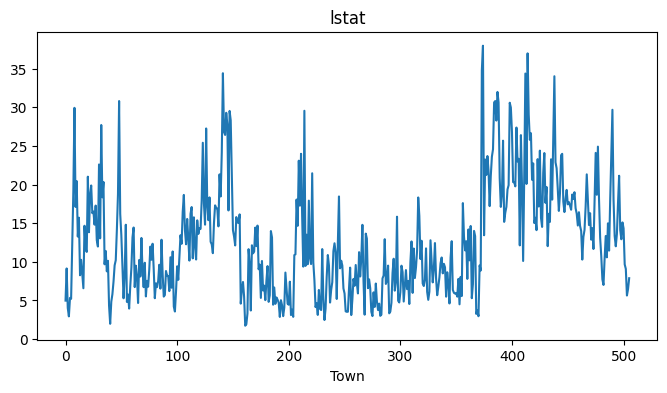

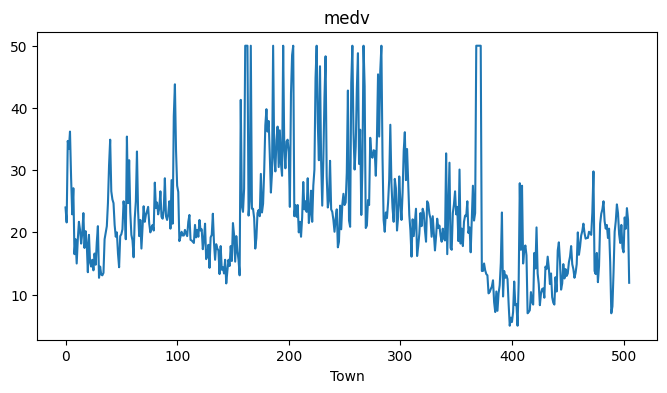

In [27]:
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.plot(boston_df[col])
    plt.title(col)
    plt.xlabel('Town')
    plt.tight_layout
    
    plt.show()

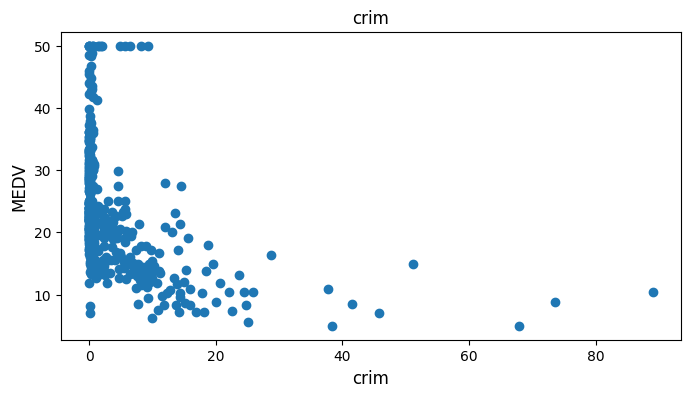

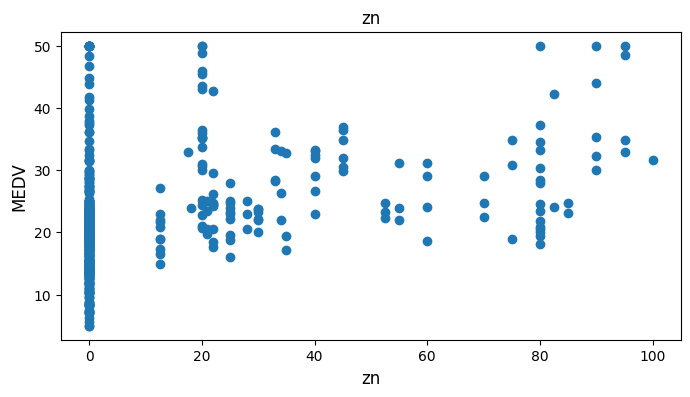

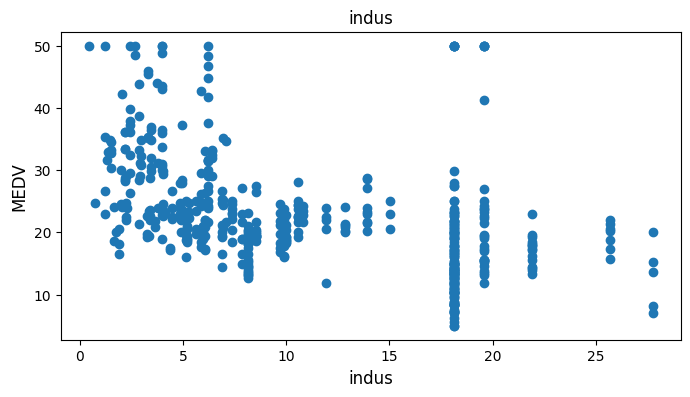

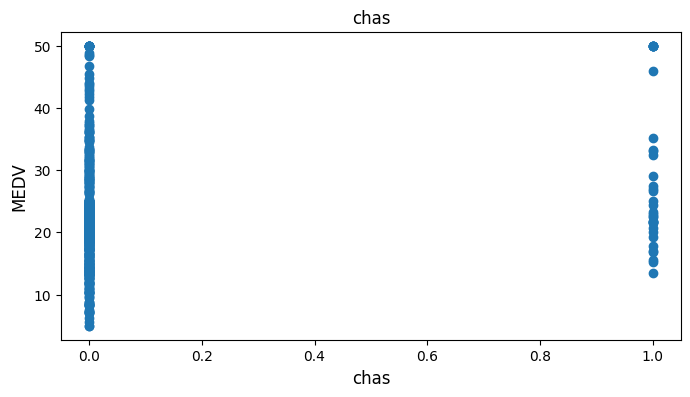

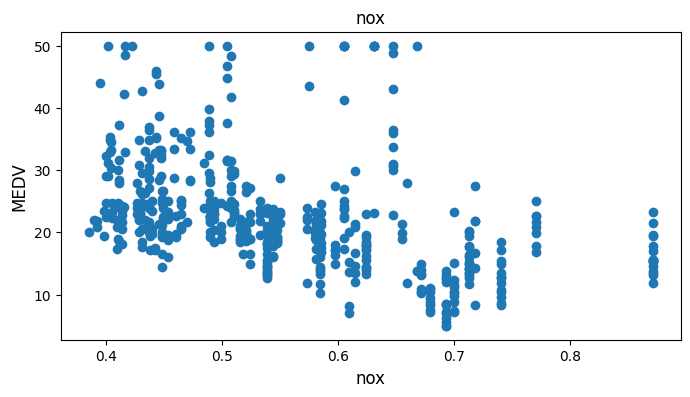

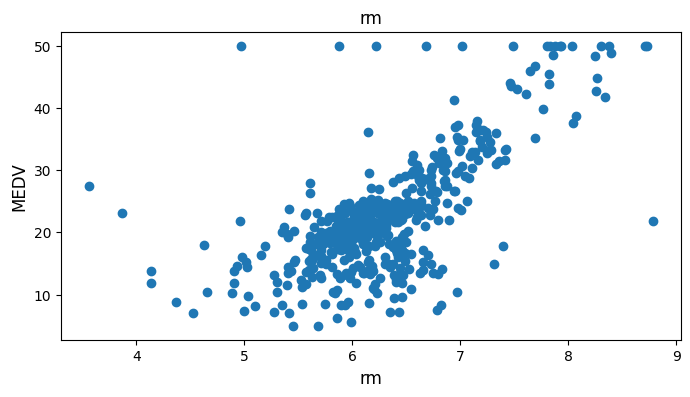

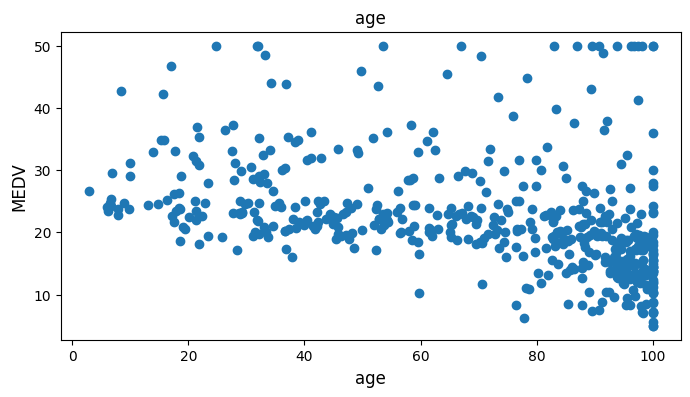

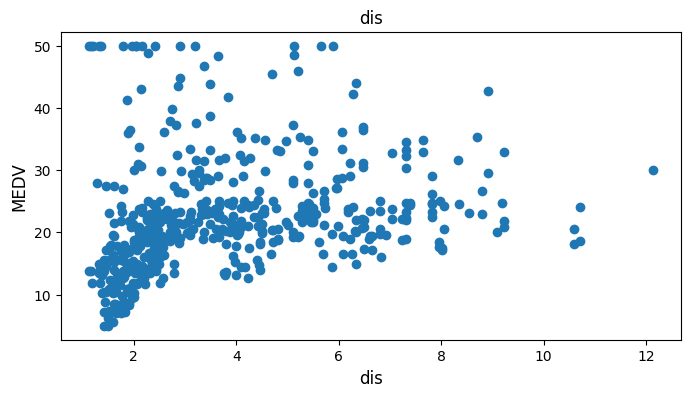

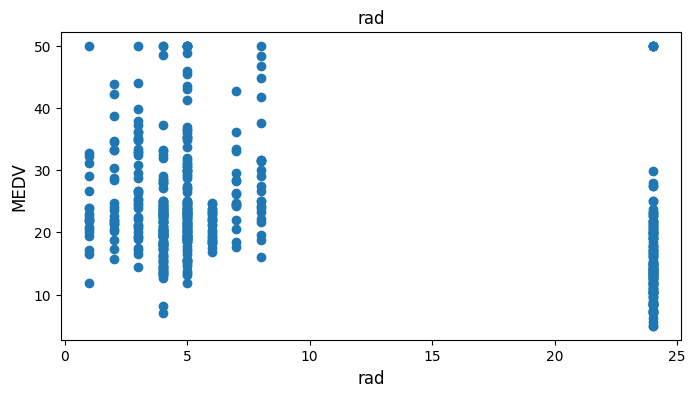

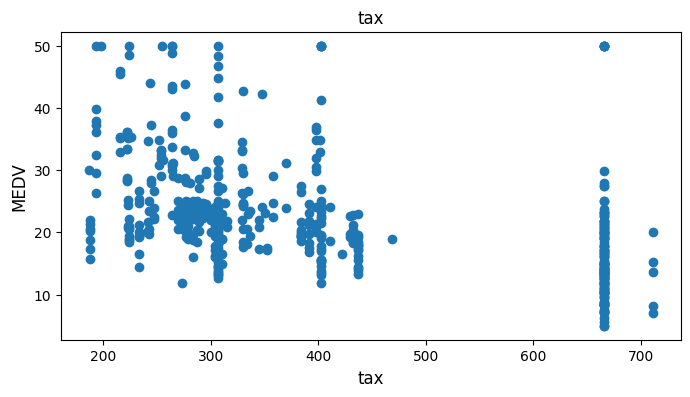

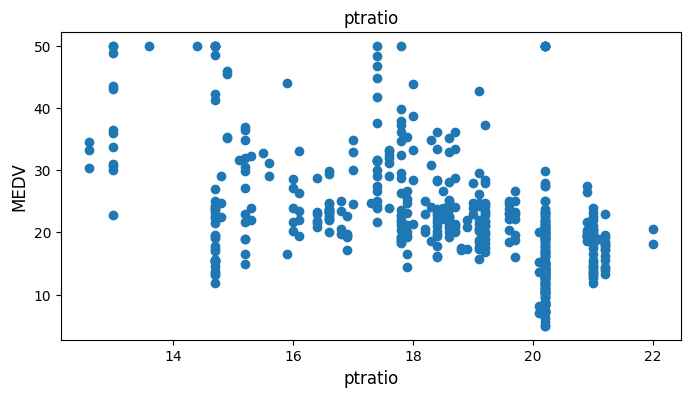

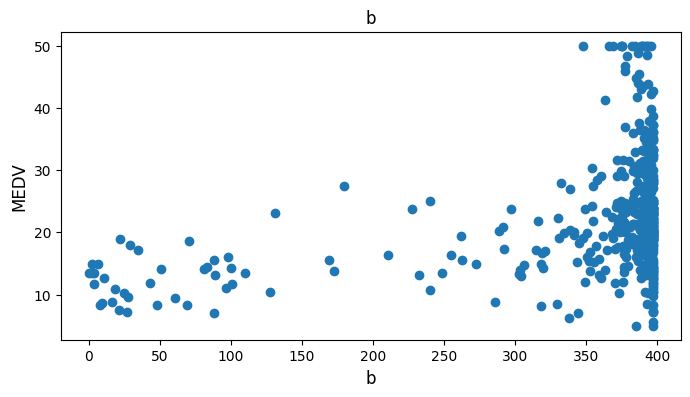

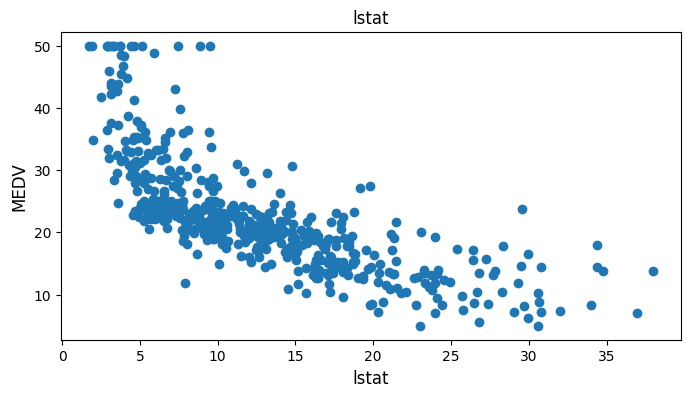

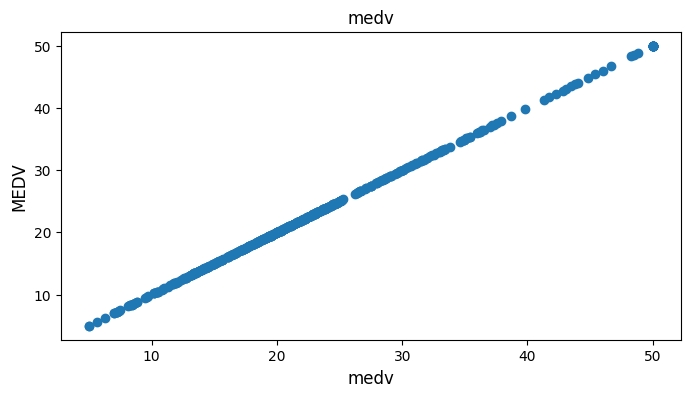

In [29]:
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.scatter(boston_df[col], boston_df['medv'])
    plt.title(col)
    plt.xlabel(col, size=12)
    plt.ylabel('MEDV', size=12)
    plt.tight_layout
    
    plt.show()

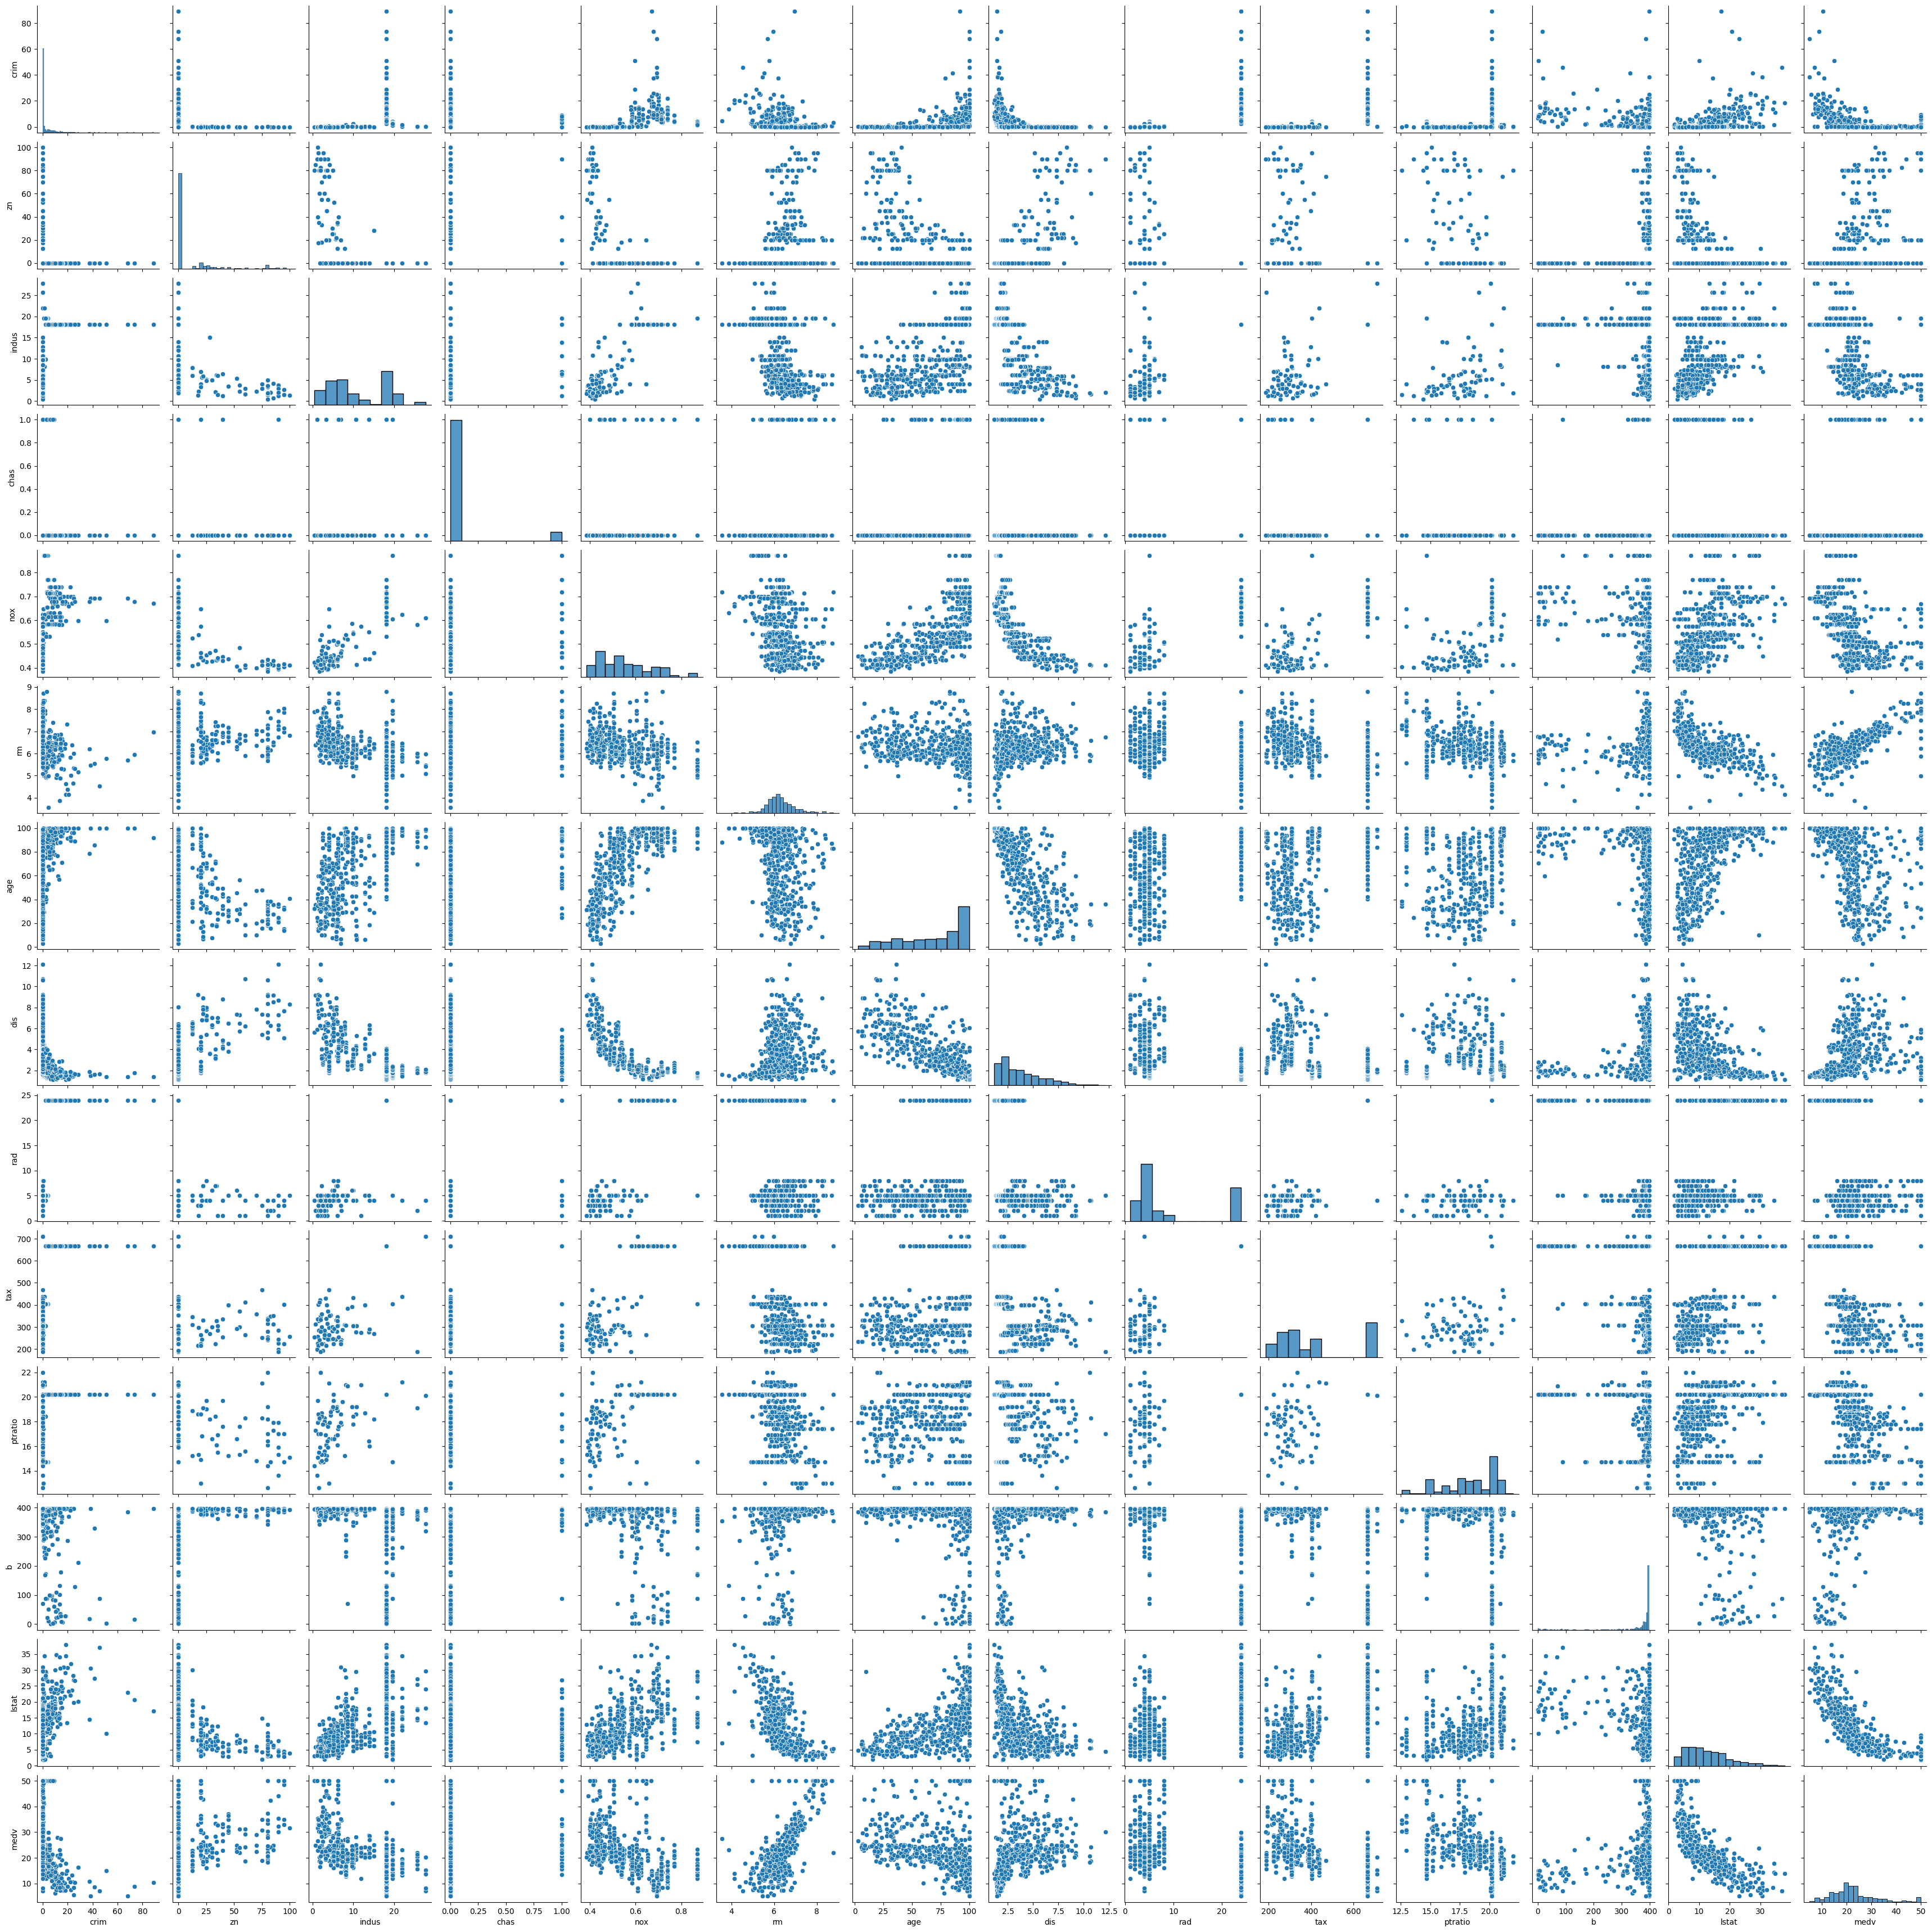

In [31]:
import seaborn as sns

fig = sns.pairplot(boston_df)

### 보스턴 주택 가격에 대한 선형 회귀

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1], boston_df.iloc[:,-1:], test_size=0.2, random_state=42)

model.fit(X_train, y_train)

LinearRegression()

In [48]:
print(f'학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test, y_test)}')

학습 데이터 점수 : 0.7508856358979673
평가 데이터 점수 : 0.6687594935356317


* 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* `cross_val_score()` 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, boston_df.iloc[:,:-1], boston_df.iloc[:,-1:], cv=10, scoring='neg_mean_squared_error')

print(f'NMSE scores: {scores}')
print(f'NMSE scores mean: {scores.mean()}')
print(f'NMSE scores std: {scores.std()}')

NMSE scores: [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSE scores mean: -34.705255944524815
NMSE scores std: 45.573999200308805


* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [52]:
r2_scores = cross_val_score(model, boston_df.iloc[:,:-1], boston_df.iloc[:,-1:], cv=10, scoring='r2')

print(f'R2 scores : {r2_scores}')
print(f'R2 scores mean : {r2_scores.mean()}')
print(f'R2 scores std : {r2_scores.std()}')

R2 scores : [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean : 0.20252899006056796
R2 scores std : 0.5952960169512175


생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터

In [53]:
print(f'y =' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c) + '* X' + str(i))

y =[30.24675099] 
[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]* X0
